In [4]:
import pandas as pd
import seaborn as sns

In [5]:
sns.set(rc={'figure.figsize':(11,8)})
sns.set(font_scale=1.5)

In [40]:
!echo process_count,teilSudokus,loesungs_zeit,gesamt_zeit> 9xkillerD.csv

Der Prozess kann nicht auf die Datei zugreifen, da sie von einem anderen Prozess verwendet wird.


In [29]:
#printf("%d,%d,%f,%f\n", process_count, possibleSolutionsCount, solutionTime, duration);

path = r"C:\Users\homari\Documents\GitHub\HPC_Gruppe1\source\x64\Release\project.exe"
filename = "9xnormalA.csv"

!echo process_count,teilSudokus,loesungs_zeit,gesamt_zeit> {filename}
for i in range(8):
    for j in range(1):
        procs = 2**i
        !mpiexec -n {procs} {path} >> {filename}
    print(i, "done")

0 done
1 done
2 done
3 done
4 done
5 done
6 done
^C
7 done


In [9]:
!mpiexec -n {procs} C:\Users\homari\Documents\GitHub\HPC_Gruppe1\source\x64\Release\project.exe

#procs 24, pid 11 : Solution found!<--------------------------
  AAAAA procs 24, pid 11 Lösunngs Duration: 0.048823
  \\_// Duration teilsudokus: 0.000063  possibleSolutionsCount: 32
  \\_// procs 24, pid 0 Duration: 2.164845
 11 3 13 16 10 14 12 6 9 2 1 4 15 8 5 7
 8 5 7 15 9 4 1 2 3 16 11 13 10 14 12 6
 14 12 6 10 11 3 13 16 8 15 7 5 9 4 1 2
 4 1 2 9 8 5 7 15 14 10 6 12 11 3 13 16
 3 13 16 11 14 12 6 10 4 9 2 1 8 5 7 15
 5 7 15 8 4 1 2 9 12 11 16 3 14 13 6 10
 12 6 10 14 3 13 16 11 5 8 15 7 4 1 2 9
 1 2 9 4 5 7 15 8 13 14 10 6 3 12 16 11
 13 16 11 3 12 6 10 14 1 4 9 2 5 7 15 8
 7 15 8 5 1 2 9 4 11 3 13 16 12 6 10 14
 6 10 14 12 13 16 11 3 7 5 8 15 1 2 9 4
 2 9 4 1 7 15 8 5 6 12 14 10 13 16 11 3
 10 14 12 6 16 11 3 13 15 7 5 8 2 9 4 1
 15 8 5 7 2 9 4 1 16 13 3 11 6 10 14 12
 16 11 3 13 6 10 14 12 2 1 4 9 7 15 8 5
 9 4 1 2 15 8 5 7 10 6 12 14 16 11 3 13



In [14]:
df16 = pd.read_csv('16xSehrSchwer.csv')

In [3]:
df16

,process_count,teilSudokus,loesungs_zeit,gesamt_zeit
0,1,1,2.171734,2.171746
1,1,1,2.192479,2.192492
2,1,1,2.179331,2.179355
3,1,1,2.183961,2.183980
4,2,6,2.176847,2.177233
5,2,6,2.183780,2.184663
6,2,6,2.213000,2.214091
7,2,6,2.162520,2.163416
8,4,6,2.178451,2.179050
9,4,6,2.184654,2.185466


In [21]:
plot_df16 = df.groupby("process_count").mean()
plot_df16

,teilSudokus,loesungs_zeit,gesamt_zeit
process_count,,,
1,1.0,2.181876,2.181893
2,6.0,2.184037,2.184851
4,6.0,2.173079,2.173720
8,20.0,2.195483,2.196978
16,20.0,2.190889,2.192359
32,32.0,0.049470,2.143634
64,73.0,0.060626,2.150889
128,180.0,0.095424,0.837216
256,284.0,0.104424,0.862597


[Text(0.5, 1.0, '16xSehrSchwer gesamt_zeit')]

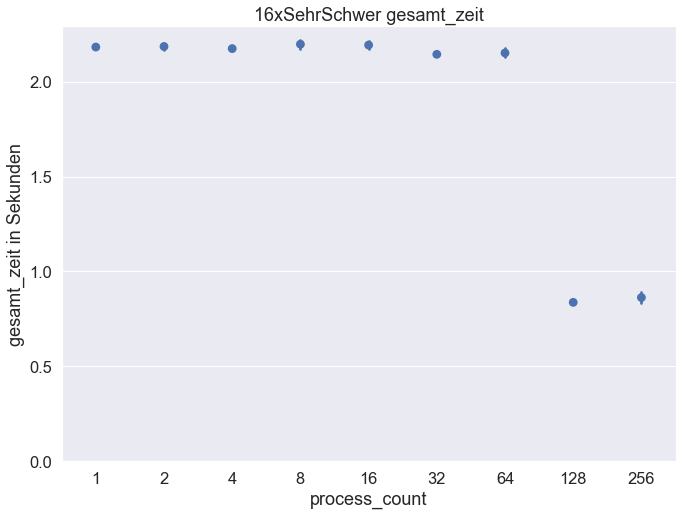

In [46]:

#You can change the type of confidence interval from the default 95% with the ci parameter:
ax = sns.pointplot(data=df16, x="process_count", y="gesamt_zeit", dodge=True, join=False, ci='sd')
ax.set(ylabel='gesamt_zeit in Sekunden')
ax.set_ylim(bottom=0)
ax.set(title='16xSehrSchwer gesamt_zeit')

[Text(0.5, 1.0, '16xSehrSchwer loesungs_zeit')]

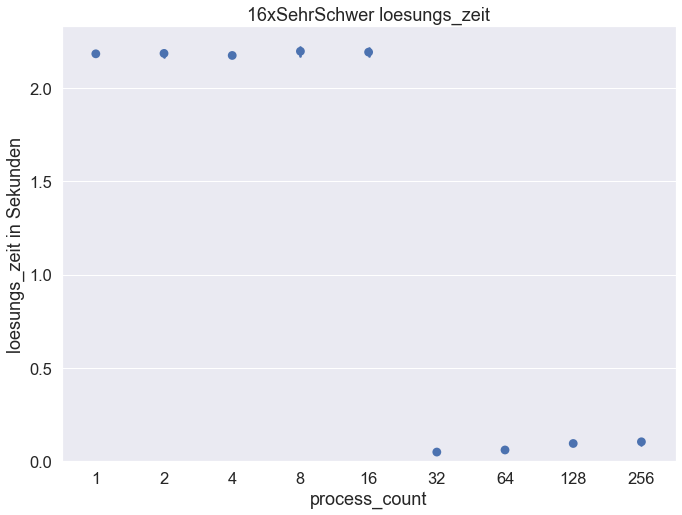

In [48]:

ax = sns.pointplot(data=df16, x="process_count", y="loesungs_zeit", dodge=True, join=False, ci='sd')
ax.set(ylabel='loesungs_zeit in Sekunden')
ax.set_ylim(bottom=0)
ax.set(title='16xSehrSchwer loesungs_zeit')

In [30]:
df9 = pd.read_csv('9xkiller.csv')

In [31]:
df9

,process_count,teilSudokus,loesungs_zeit,gesamt_zeit
0,1,1,0.000039,0.000045
1,1,1,0.000041,0.000047
2,1,1,0.000048,0.000055
3,1,1,0.000041,0.000047
4,2,2,0.000042,0.000203
5,2,2,0.000051,0.000201
6,2,2,0.000042,0.000207
7,2,2,0.000042,0.000197
8,4,4,0.000044,0.000283
9,4,4,0.000046,0.000235


[Text(0.5, 1.0, '9xkiller gesamt_zeit')]

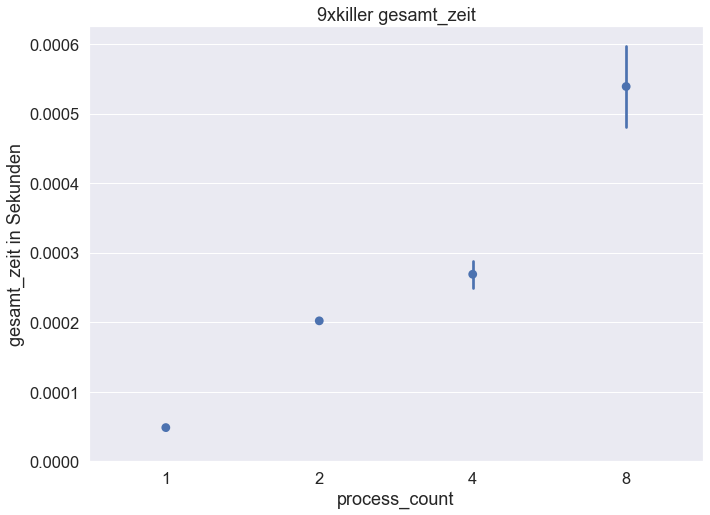

In [51]:
#sns.scatterplot(data=plot_df, x="process_count", y="gesamt_zeit")
#You can change the type of confidence interval from the default 95% with the ci parameter:

ax = sns.pointplot(data=df9, x="process_count", y="gesamt_zeit", dodge=True, join=False, ci='sd')
ax.set(ylabel='gesamt_zeit in Sekunden')
ax.set_ylim(bottom=0)
ax.set(title='9xkiller gesamt_zeit')

[Text(0.5, 1.0, '9xkiller loesungs_zeit')]

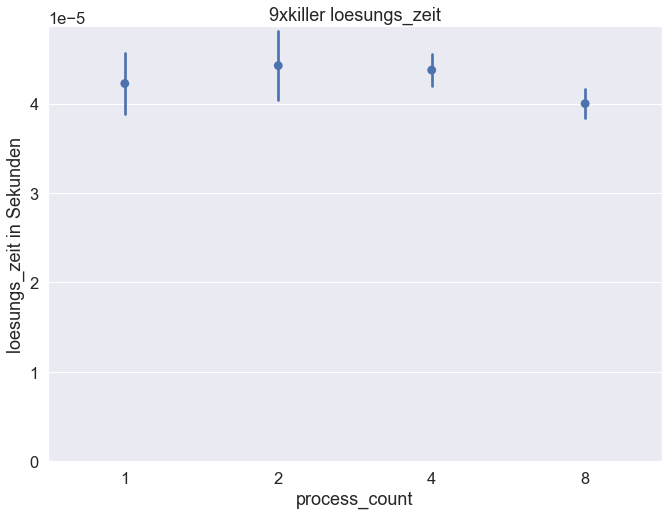

In [52]:
ax = sns.pointplot(data=df9, x="process_count", y="loesungs_zeit", dodge=True, join=False, ci='sd')
ax.set(ylabel='loesungs_zeit in Sekunden')
ax.set_ylim(bottom=0)
ax.set(title='9xkiller loesungs_zeit')